In [5]:
!pip install matplotlib
!pip install scipy
!pip install numpy
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 25.8 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 KB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.8 MB/s eta 0:00:0000:0100:01


In [6]:
# Pour faire apparaître les graphes sous forme d'images .png dans le notebook

# Pour faire apparaître les graphes dans des figures interactives
#%matplotlib notebook

import IPython.display as ipd
from ipywidgets import *
import scipy.io.wavfile as wavfile
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile #attention: ne fonctionne pas avec les fichiers audio à 2 canaux
import scipy.signal as signal

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/Serie6
%ls

/content/drive/MyDrive/Colab Notebooks/Serie6
gunshot.wav  resultatViolon.wav  violin.wav


Rappel: Raccourcis clavier

| Commande   |      Windows      |  Mac OS |
|------------------|:-------------------:|----------- :|
| Sauver|  Ctr+S | cmd+S  |
| Annuler |    Ctr+Z   |   cmd+Z |
| Rétablir | Ctr+Y |    cmd+Y |

## Traitement du signal et d'images
# Série 6 - Le filtrage des signaux 1D

Dans cette série, vous allez effectuer des filtrage de signaux 1D.

Avant d'effectuer les exercices, commencez par lire la théorie suivante sur le **filtrage numérique par convolution** (`chapitre 1. Introduction` et `2. Filtrage des signaux`).<br>
https://www.f-legrand.fr/scidoc/docmml/numerique/filtre/convolution/convolution.html

En Python, la convolution discrète est effectuée à l'aide de la fonction `np.convolve()`:<br>
https://numpy.org/doc/1.19/reference/generated/numpy.convolve.html

# Exercice 1: La réponse impulsionnelle

**1.1** La réponse impulsionnelle caractérise complètement un système. Cet exercice permet de le démontrer avec des signaux audio.


Écouter les deux fichiers audio `violin.wav` et `gunshot.wav` (à télécharger sur Cyberlearn). Le fichier `violin.wav` contient un morceau de violon. Le fichier `gunshot.wav` contient le son d’un coup de feu tiré dans une salle. La salle correspond au système. Le morceau de violon correspond au signal d’entrée. Le coup de feu correspond à une **impulsion de Dirac**. Le coup de feu tiré dans la salle correspond à **la réponse impulsionnelle** du système (ici la salle).


In [8]:
# Entrer votre code ici
fs_violin, violin_data = wavfile.read('violin.wav')
fs_gunshot, gunshot_data = wavfile.read('gunshot.wav')

# Display audio players for listening
display(ipd.Audio(violin_data, rate=fs_violin))  # Violin audio
display(ipd.Audio(gunshot_data, rate=fs_gunshot))  # Gunshot audio


**1.2**  Effectuer la convolution entre les signaux audio contenu dans ```gunshot.wav``` et ```violin.wav``` puis écouter le résultat. Vous devriez entendre le son du violon avec la réverbération de la salle dans laquelle le coup de feu a été tiré.
<br>
Attention: Le type de données des signaux  a été changé en int (int64) sinon la convolution va engendrer un dépassement de la valeur max des données int16 $2^{16}=65536$.<br>

In [9]:
if fs_violin != fs_gunshot:
    raise ValueError("Les fréquences d'échantillonnage des fichiers ne correspondent pas.")

# Normaliser les signaux pour éviter les dépassements
violin_data = violin_data / np.max(np.abs(violin_data))
gunshot_data = gunshot_data / np.max(np.abs(gunshot_data))

# Effectuer la convolution
convolved_signal = signal.convolve(violin_data, gunshot_data, mode='full')

# Normaliser le signal convolué pour éviter les dépassements dans l'audio final
convolved_signal = convolved_signal / np.max(np.abs(convolved_signal))

# Convertir en int16 pour la sauvegarde et l'écoute
convolved_signal_int16 = (convolved_signal * 32767).astype(np.int16)

# Écouter le signal convolué
display(ipd.Audio(convolved_signal_int16, rate=fs_violin))


In [11]:
# Entrer votre code ici

#Attention changement de type sinon dépassement de la valeur max en int16 (2^16=65536)
# print("Avant le changement de type", type(h[0]))
# h2=h.astype(int)
# print("Après le changement de type", type(h2[0]))
# x2=x.astype(int)

# Exercice 2: Le filtre médian

Soit le signal sinusoïdal ci-dessous contaminé par du bruit impulsionnel. Le filtre médian est le filtre le plus optimal pour enlever du bruit impulsonnel.

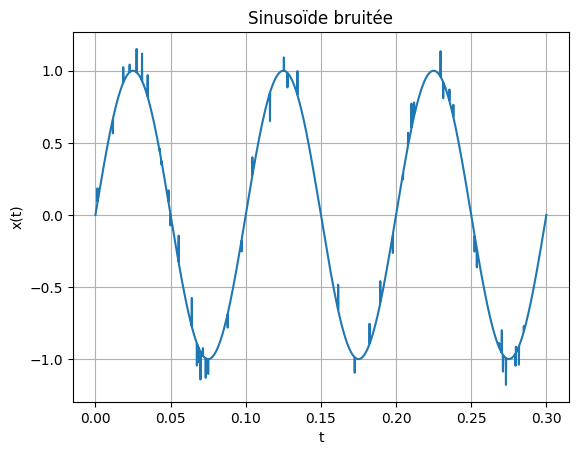

In [13]:
# Création du signal à filtrer

# sinusoïde
fe=8000 # (Hz)
Te=1/fe
nT=3 # Nbre de périodes du signal sinoïdale
f=10 # (Hz) Fréquence du signal sinoïdale
T=1/f # (s) Durée d'une période du signal sinoïdale
tmin=0 # (s)
tmax=nT*T # (s)
t=np.arange(tmin,tmax,Te)
x=np.sin(2*np.pi*f*t)

# Bruit impulsionnel
P=50
for p in np.arange(P):
    i= np.random.randint(low=0, high=len(x), size=1)
    A=np.random.uniform(low=0, high=len(x), size=1)
    x[i] += np.random.uniform(low=-0.2, high=0.2, size=1)

# Affichage de la sinusoïde bruitée
plt.figure()
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Sinusoïde bruitée')
plt.grid(True)

**2.1** La sortie du filtre médian peut-elle être calculée par convolution? Justifier votre réponse.

La sortie du filtre médian ne peut pas être calculée par convolution.

La convolution est une opération linéaire dans laquelle chaque point de sortie est obtenu en prenant une combinaison linéaire (pondérée) des points d'entrée à l'aide d'un noyau défini.

Le filtre médian est une opération non linéaire. Il remplace chaque point d'un signal par la médiane d'un voisinage défini autour de ce point.

**2.2** Appliquer un filtre médian sur le signal sinusoïdal bruité pour enlever le bruit impulsionnel. La fonction à utiliser est ```signal.medfilt(x,kernel_size)```<br>
Référence: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html

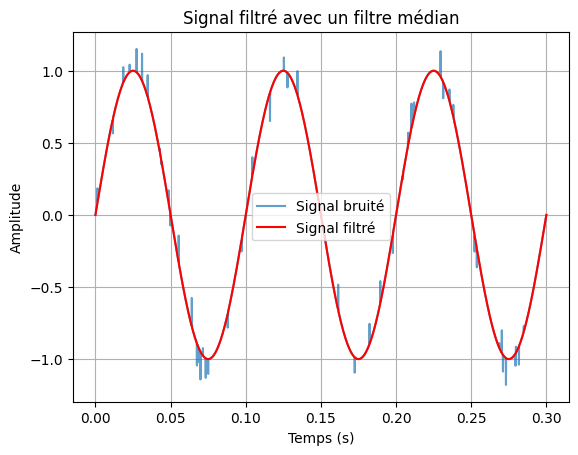

In [16]:
# Entrer votre réponse ci-dessous
# Application du filtre médian
kernel_size = 5  # Taille de la fenêtre (doit être impair)
x_filtered = signal.medfilt(x, kernel_size)

# Affichage du signal filtré
plt.figure()
plt.plot(t, x, label="Signal bruité", alpha=0.7)
plt.plot(t, x_filtered, label="Signal filtré", color="red")
plt.title("Signal filtré avec un filtre médian")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()


# Exercice 3: Le filtre dérivateur

Soit le signal sigmoïde (courbe en forme de S) ci-dessous. On désire détecter automatiquement le changement d'amplitude de ce signal à l'aide d'un filtre dérivateur.

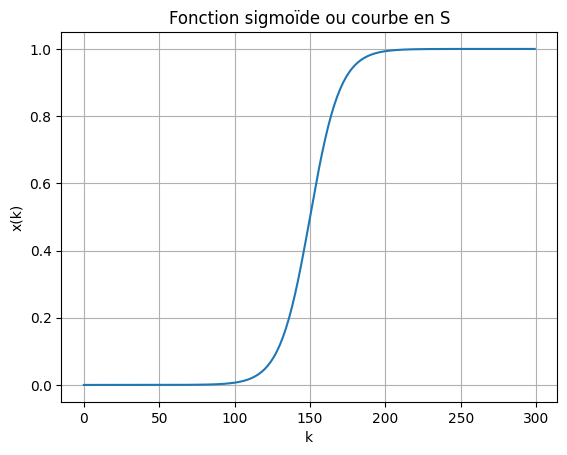

In [20]:
# Création du signal à filtrer: une sigmoïde

def sigmoid(lmda):
  kmax=150
  k=np.arange(-kmax,kmax) #indices temporels
  return 1 / (1 + np.exp(-lmda*k))

x=sigmoid(lmda=0.1) #le paramètre lambda règle la pente de la sigmoïde

plt.figure()
plt.plot(x)
plt.xlabel('k')
plt.ylabel('x(k)')
plt.title('Fonction sigmoïde ou courbe en S')
plt.grid()

**3.1** La sortie de ce filtre peut-elle être calculée par convolution? Justifier votre réponse.

La dérivée discrète d'un signal (approximée par différences finies) est une opération linéaire qui peut être calculée par convolution. Ainsi, un filtre dérivateur peut être appliqué en convoluant le signal avec sa réponse impulsionnelle.

**3.2** Créer un signal h(k) correspondant à la réponse impulsionnelle du filtre dérivateur.

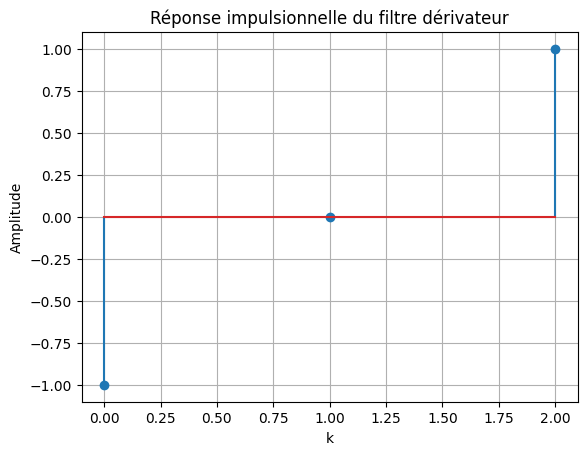

In [22]:
# Entrer votre code ici
#Aide: h = np.array([b0,b1])

# Réponse impulsionnelle du filtre dérivateur
h = np.array([-1, 0, 1])

# Affichage de la réponse impulsionnelle
plt.stem(h)
plt.title("Réponse impulsionnelle du filtre dérivateur")
plt.xlabel("k")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

**3.3** Filtrer la fonction sigmoïde en la convoluant avec la réponse impulsionnelle du filtre dérivateur.

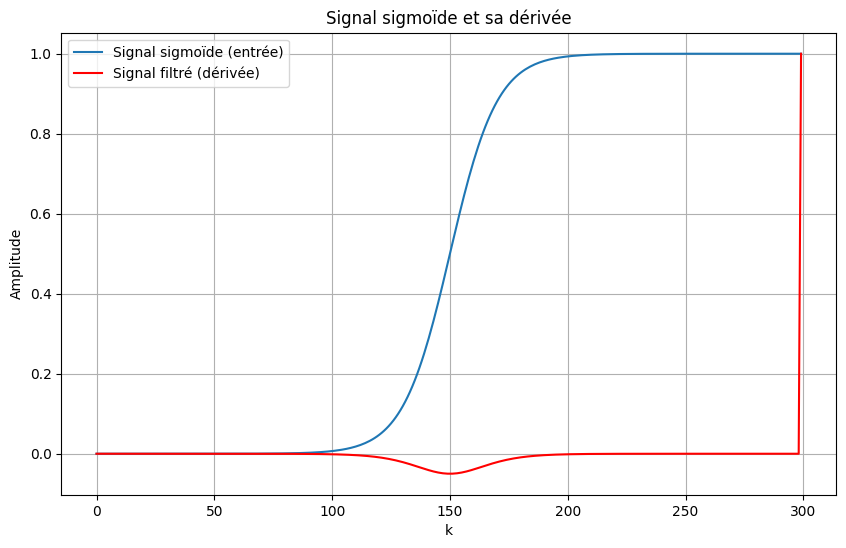

In [23]:
# Entrer votre code ici
# Filtrage par convolution
y = np.convolve(x, h, mode='same')  # Convolution avec la réponse impulsionnelle

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(x, label="Signal sigmoïde (entrée)")
plt.plot(y, label="Signal filtré (dérivée)", color="red")
plt.title("Signal sigmoïde et sa dérivée")
plt.xlabel("k")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()



# Exercice 4: Le filtre moyenneur

Soit le signal contaminé par du bruit gaussien ci-dessous.

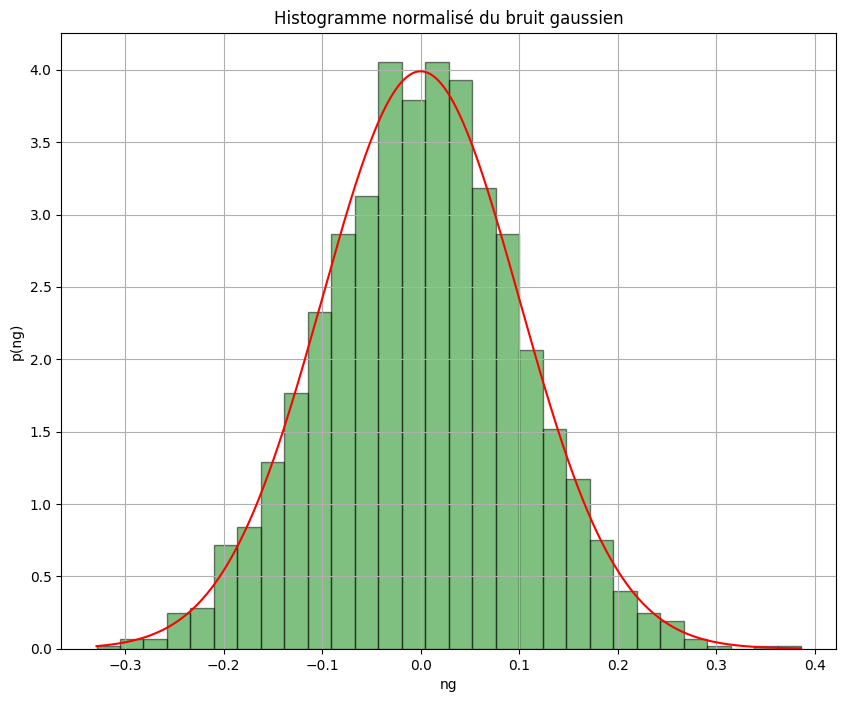

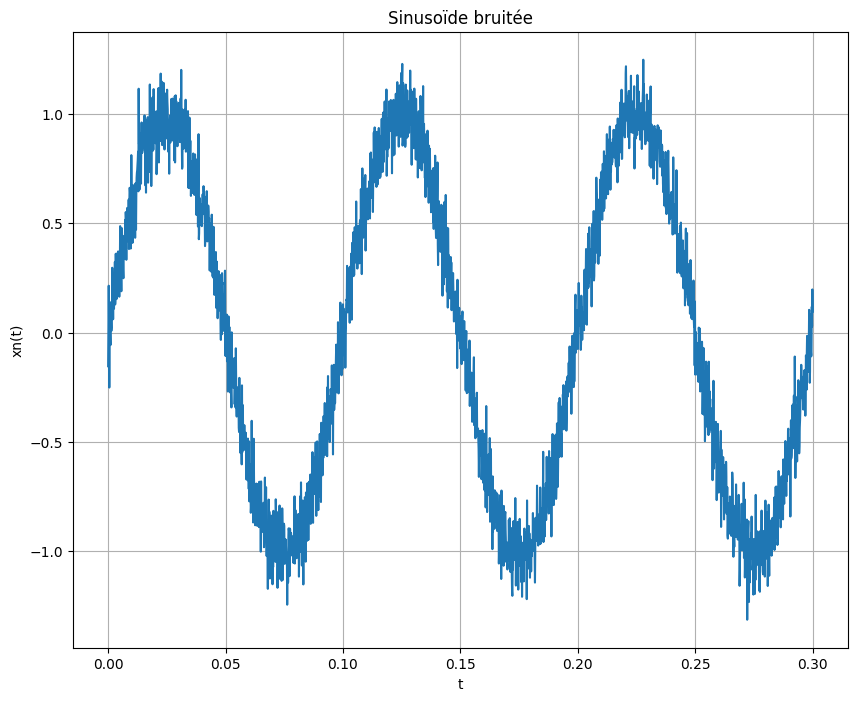

In [24]:
# Création du signal à filtrer: une sinusoïde avec du bruit gaussien

fe=8000 # (Hz)
Te=1/fe
nT=3 # Nbre de périodes du signal sinoïdale
f0=10 # (Hz) Fréquence du signal sinoïdale
T=1/f0 # (s) Durée d'une période du signal sinoïdale
tmin=0 # (s)
tmax=nT*T # (s)
t=np.arange(tmin,tmax,Te)
x=np.sin(2*np.pi*f0*t) # sinusoïde

# Bruit Gaussien
mu = 0
sigma = 0.1
N=len(t)
ng=np.random.normal(loc=mu, scale=sigma, size=N)

# Distribution gaussienne
def gaussian(x,mu,sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*np.power((x - mu)/sigma, 2.))

# Affichage de l'histogramme normalisé du bruit gaussien
largeur=10
hauteur=8
plt.figure(figsize=(largeur,hauteur))
num_bins = 30
plt.hist(ng, num_bins, density=True, edgecolor='black', facecolor='green', alpha=0.5)
plt.xlabel('ng')
plt.ylabel('p(ng)')
plt.title('Histogramme normalisé du bruit gaussien')
plt.grid()
tg=np.arange(np.min(ng),np.max(ng),Te)
gf=gaussian(tg,mu,sigma)
plt.plot(tg,gf,'r')

# Sinusoïde bruitée
xn=x+ng

# Affichage de la sinusoïde bruitée
largeur=10
hauteur=8
plt.figure(figsize=(largeur,hauteur))
plt.plot(t,xn)
plt.xlabel('t')
plt.ylabel('xn(t)')
plt.title('Sinusoïde bruitée')
plt.grid()

**4.1** Créer un signal h(k) correspondant à la réponse impulsionnelle du filtre moyenneur.

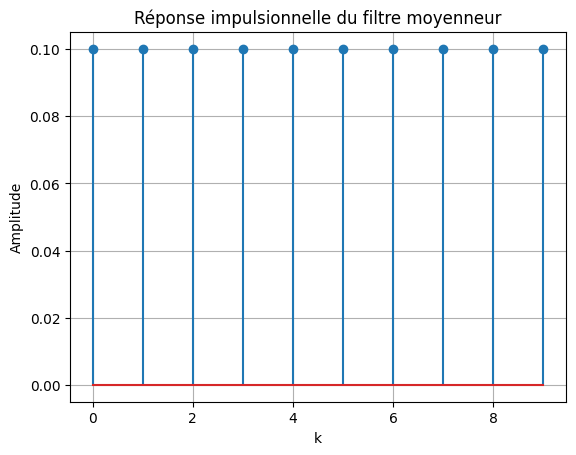

In [26]:
# Entrer votre code ici
# Taille de la fenêtre du filtre moyenneur
window_size = 10

# Réponse impulsionnelle du filtre moyenneur
h = np.ones(window_size) / window_size

# Affichage de la réponse impulsionnelle
plt.stem(h)
plt.title("Réponse impulsionnelle du filtre moyenneur")
plt.xlabel("k")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


**4.2** Filtrer le signal contaminé par le bruit Gaussien avec le filtre moyenneur.

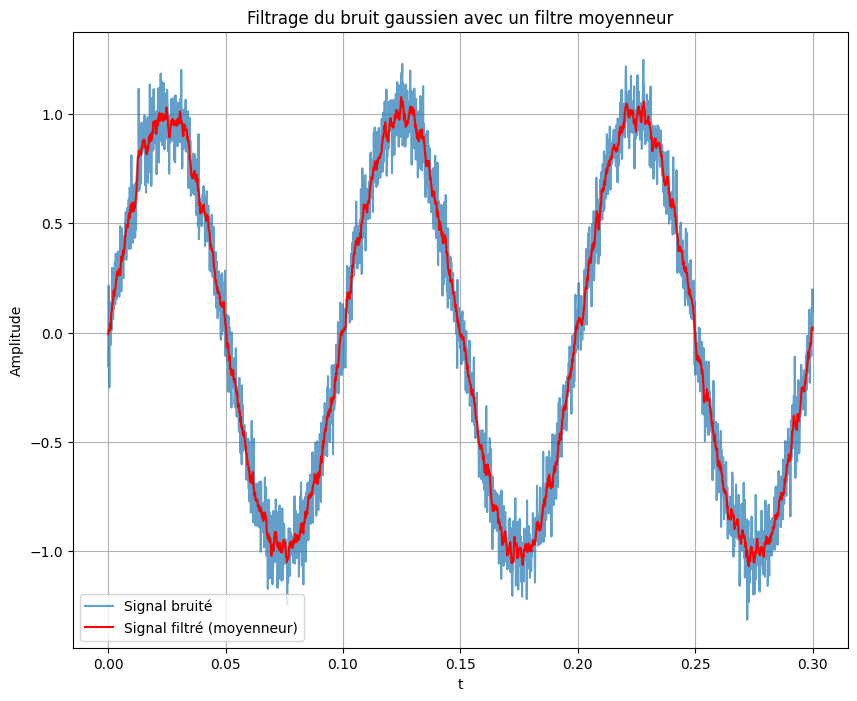

In [27]:
# Entrer votre code ici
window_size = 10
h = np.ones(window_size) / window_size

# Filtrage par convolution
xf = np.convolve(xn, h, mode='same')

# Affichage des signaux
plt.figure(figsize=(10, 8))
plt.plot(t, xn, label="Signal bruité", alpha=0.7)
plt.plot(t, xf, label="Signal filtré (moyenneur)", color="red")
plt.title("Filtrage du bruit gaussien avec un filtre moyenneur")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()
